# Evaluation metrics for classification
learn how to evaluate them properly.
In Classification, “Accuracy” is not the only metric—and often, it’s not even the best one. We need to understand the types of errors our model makes.

## Evaluation Metrics
### 1. The Confusion Matrix

The foundation of all classification metrics is the Confusion Matrix. It compares the Predicted values against the Actual values.

For a binary problem (e.g., “Sick” vs. “Healthy”), we have 4 outcomes:

- TP (True Positive): Model predicted Positive (Sick), and it was actually Positive.
- TN (True Negative): Model predicted Negative (Healthy), and it was actually Negative.
- FP (False Positive): Model predicted Positive, but it was Negative.
- FN (False Negative): Model predicted Negative, but it was Positive.
# 2. Key Metrics Definitions
1. Accuracy: How many did we get right overall.
   
 Accuracy = $\frac{TP + TN}{TF + TN + FP + FN}$
 
- Trap: If 99% of data is “Healthy”, a model that predicts “Healthy” for everyone has 99% accuracy but is useless.
  
2. Precision (Quality): When the model predicts Positive, how often is it correct.

   Precision $ = \frac{TP}{TP + FP }$
- Important for: Spam detection (We don’t want to classify important email as spam).
  
3. Recall / Sensitivity (Quantity): Out of all actual Positives, how many did we catch
   Recall = $\frac{TP}{TP + FN}$
-   Important for: Cancer detection (We simply cannot afford to miss a sick patient, even if we get some false alarms).

4. F1-Score : The harmonic means of Precision and Recall. It balances both.
    $F_1 = 2 \times \frac{Precision  \times Recall}{Precision  + Recall}$

# Implementation in Python
We will use the Breast Cancer dataset (where Recall is critical) to demonstrate these metrics.

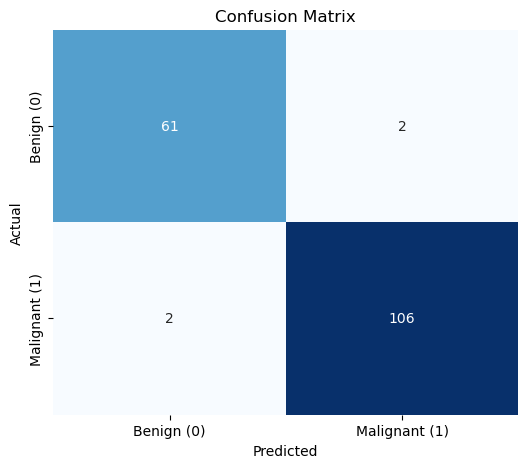

--- Metrics Calculation ---
Accuracy:  0.9766
Precision: 0.9815
Recall:    0.9815
F1-Score:  0.9815

--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X= data.data
y = data.target

# split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train model (Using Logistic Regression)
model = LogisticRegression(max_iter=10000)
model.fit(X_train , y_train)

# predict
y_pred = model.predict(X_test)

# Evaluation 
#A. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# B. Calculate Metrics Manually
print("--- Metrics Calculation ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

# C. The Classification Report (All in one)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=data.target_names))

## Which metric to choose?
- Use Accuracy if the classes are balanced (e.g., 50% cats, 50% dogs).
- Use Precision if False Positives are costly (e.g., Spam Filter).
- Use Recall if False Negatives are costly (e.g., Medical Diagnosis, Fraud Detection).
- Use F1-Score if you need a balance between Precision and Recall.